In [1]:
from google.colab import drive
drive.mount('/content/drive') #To load/save files from/to Google drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

Mounted at /content/drive


combined_data shape:  (1930125, 8)


<ipython-input-3-978cbcf533b2>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data_filled = pivot_data.fillna(method='ffill').fillna(method='bfill')


ticker                     1000SATS-USD  1INCH-USD  AAVE-USD   ADA-USD  \
Datetime                                                                 
2023-09-30 19:00:00+00:00      0.530233  -1.217104 -1.628207 -1.648545   
2023-09-30 20:00:00+00:00      0.530233  -1.221380 -1.629470 -1.648459   
2023-09-30 21:00:00+00:00      0.530233  -1.219851 -1.632829 -1.651594   
2023-09-30 22:00:00+00:00      0.530233  -1.210040 -1.627613 -1.650774   
2023-09-30 23:00:00+00:00      0.530233  -1.218542 -1.642200 -1.648540   

ticker                     AERO29270-USD  AEVO-USD  AIOZ-USD   AKT-USD  \
Datetime                                                                 
2023-09-30 19:00:00+00:00       -1.71543  2.732359 -1.352977 -1.669902   
2023-09-30 20:00:00+00:00       -1.71543  2.732359 -1.353123 -1.668131   
2023-09-30 21:00:00+00:00       -1.71543  2.732359 -1.353127 -1.667496   
2023-09-30 22:00:00+00:00       -1.71543  2.732359 -1.353263 -1.667981   
2023-09-30 23:00:00+00:00       -1.71

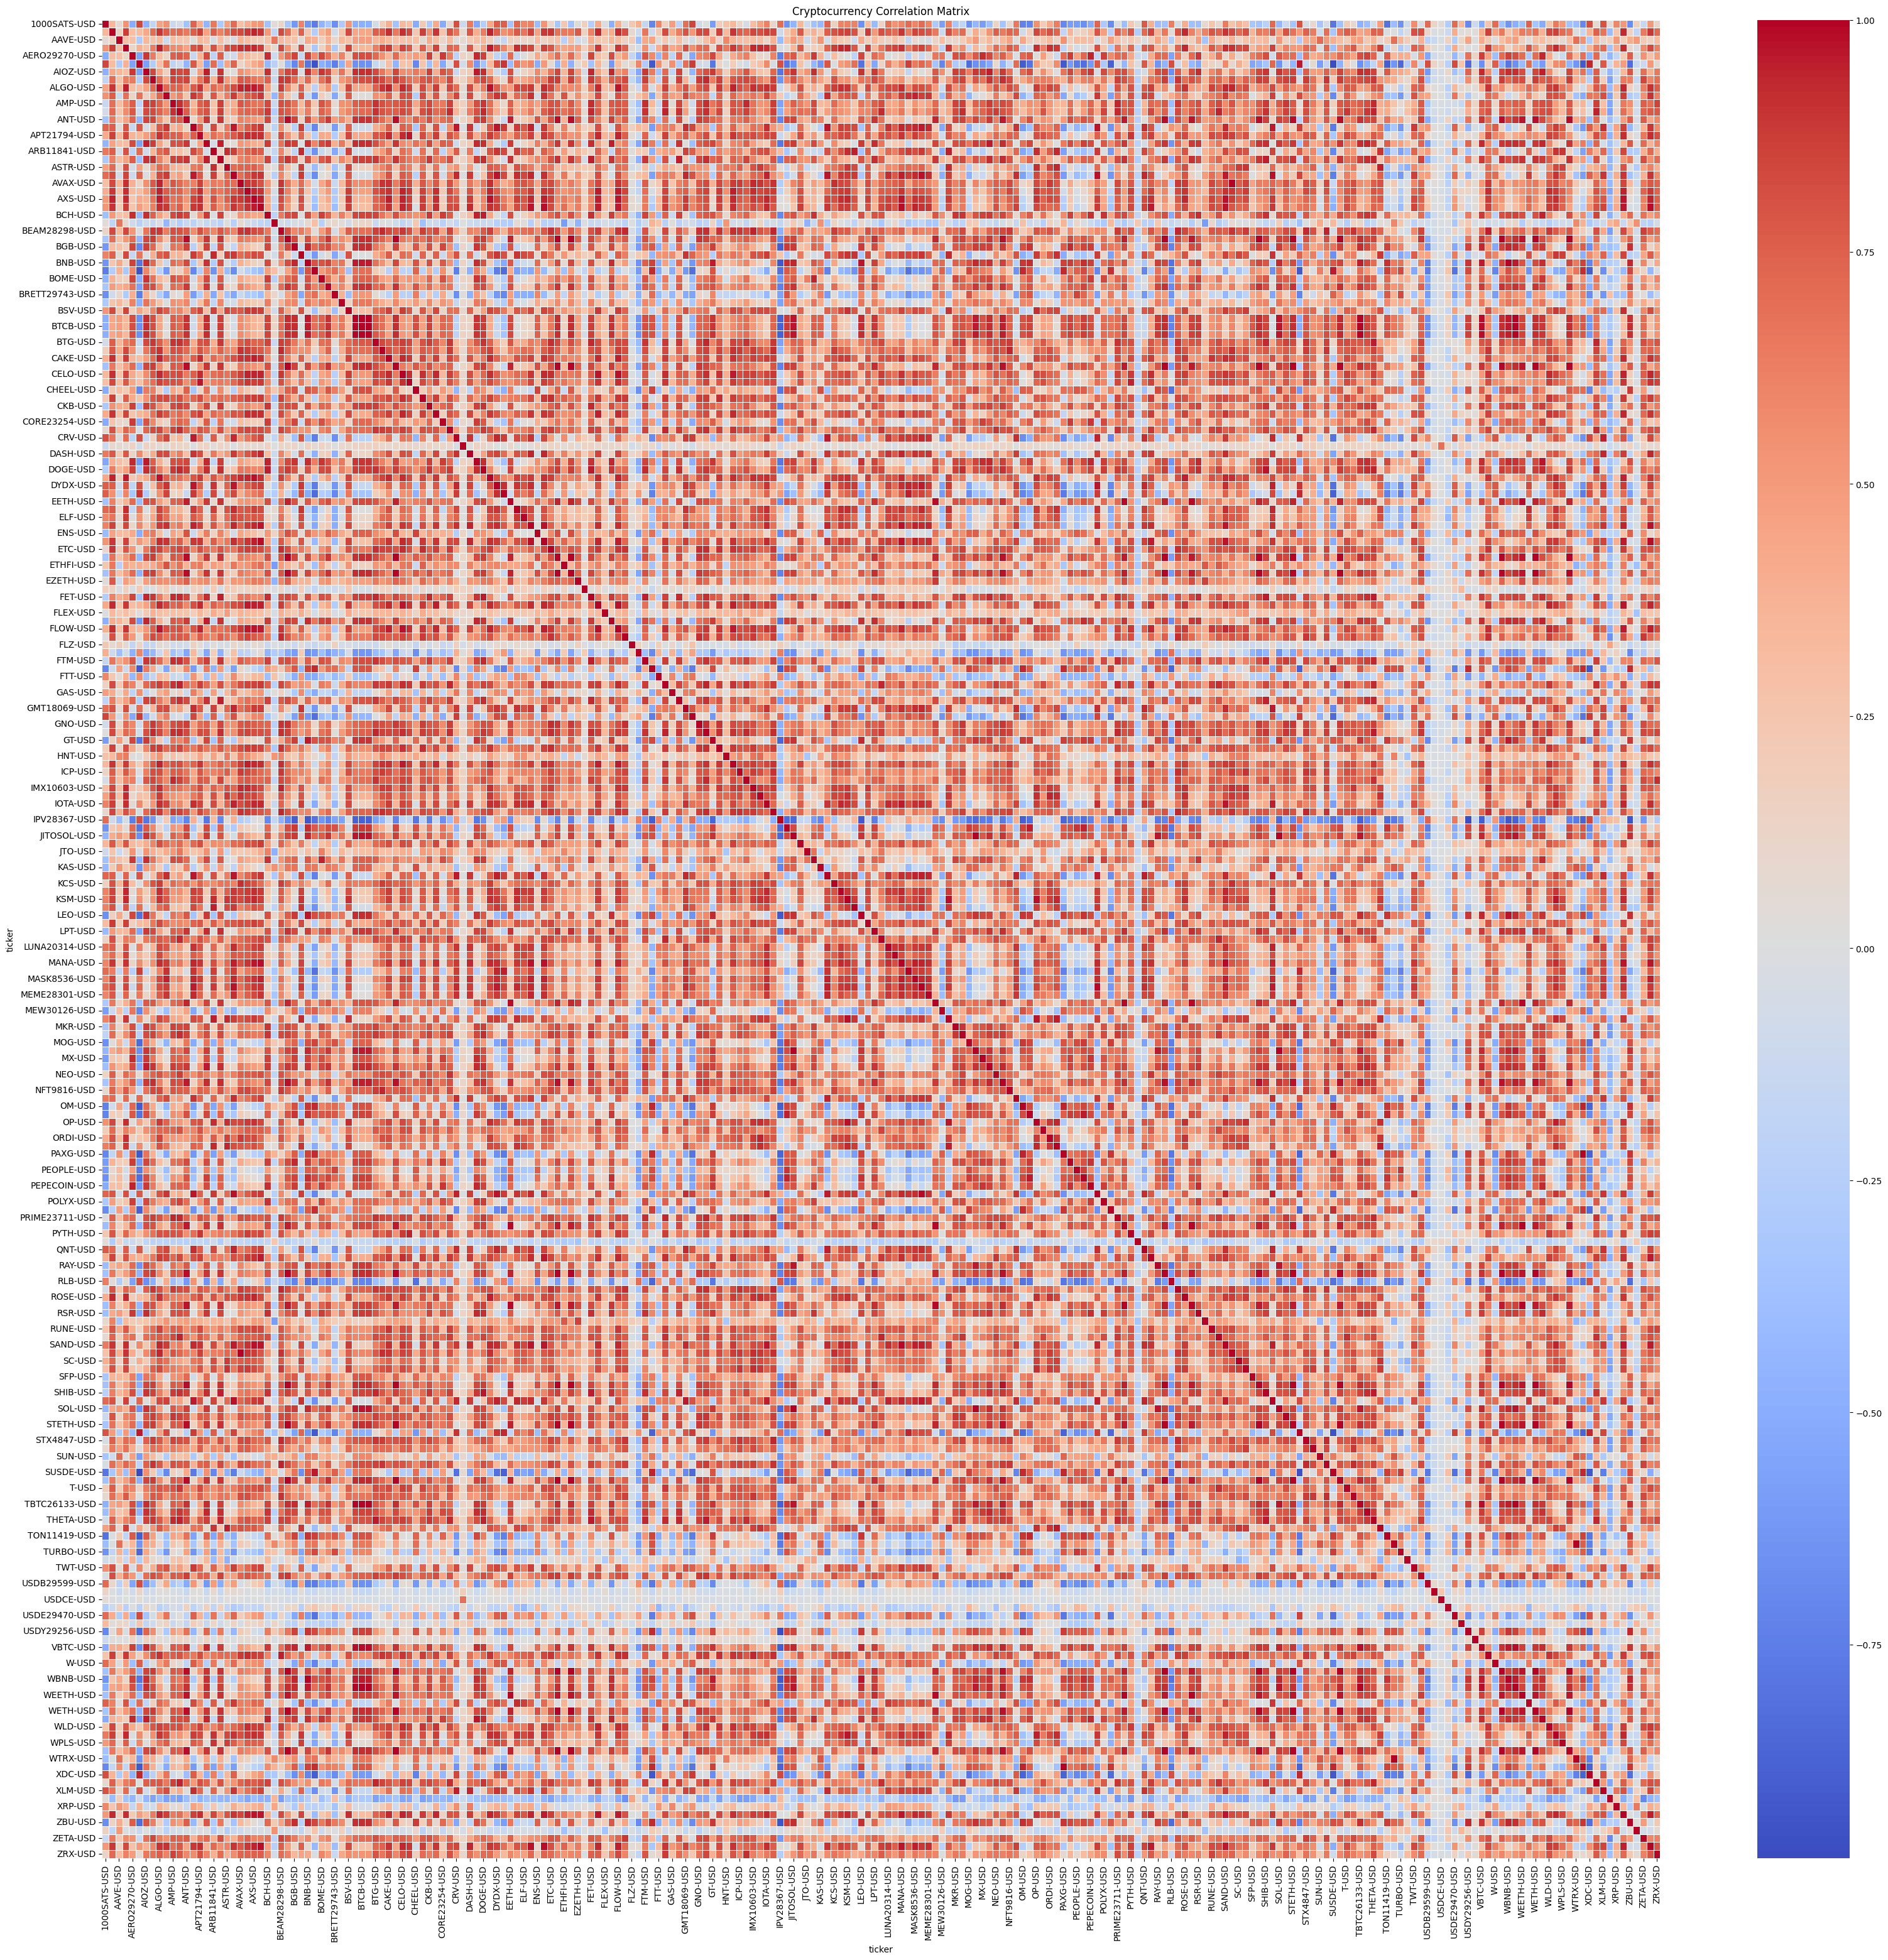

In [3]:
# Assign directory
directory = r"/content/drive/My Drive/DM-Project/data"

combined_dfs = []

# Initialize an instance of StandardScaler
scaler = StandardScaler()

# Iterate over files in directory
for file in os.listdir(directory):
    df = pd.read_csv(f'/content/drive/My Drive/DM-Project/data/{file}')
    if not df.empty:
        df = df.iloc[:,1:]
        df[['Open', 'High', 'Low', 'Close', 'Adj Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close']])
        combined_dfs.append(df)

combined_data = pd.concat(combined_dfs, ignore_index=True)

combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'])

print('combined_data shape: ',combined_data.shape)

pivot_data = combined_data.pivot(index='Datetime', columns='ticker', values='Adj Close')

# Fill forward, then backward for any remaining NaNs
pivot_data_filled = pivot_data.fillna(method='ffill').fillna(method='bfill')

print(pivot_data_filled.head())

correlation_Matrix = pivot_data_filled.corr()

print('correlation_Matrix',correlation_Matrix.head())

# Plot a heatmap to visualize correlations
plt.figure(figsize=(40, 38))  # Increase width and height
sns.heatmap(correlation_Matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Cryptocurrency Correlation Matrix')
plt.show()

<ipython-input-4-bc3191fe820f>:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='complete')


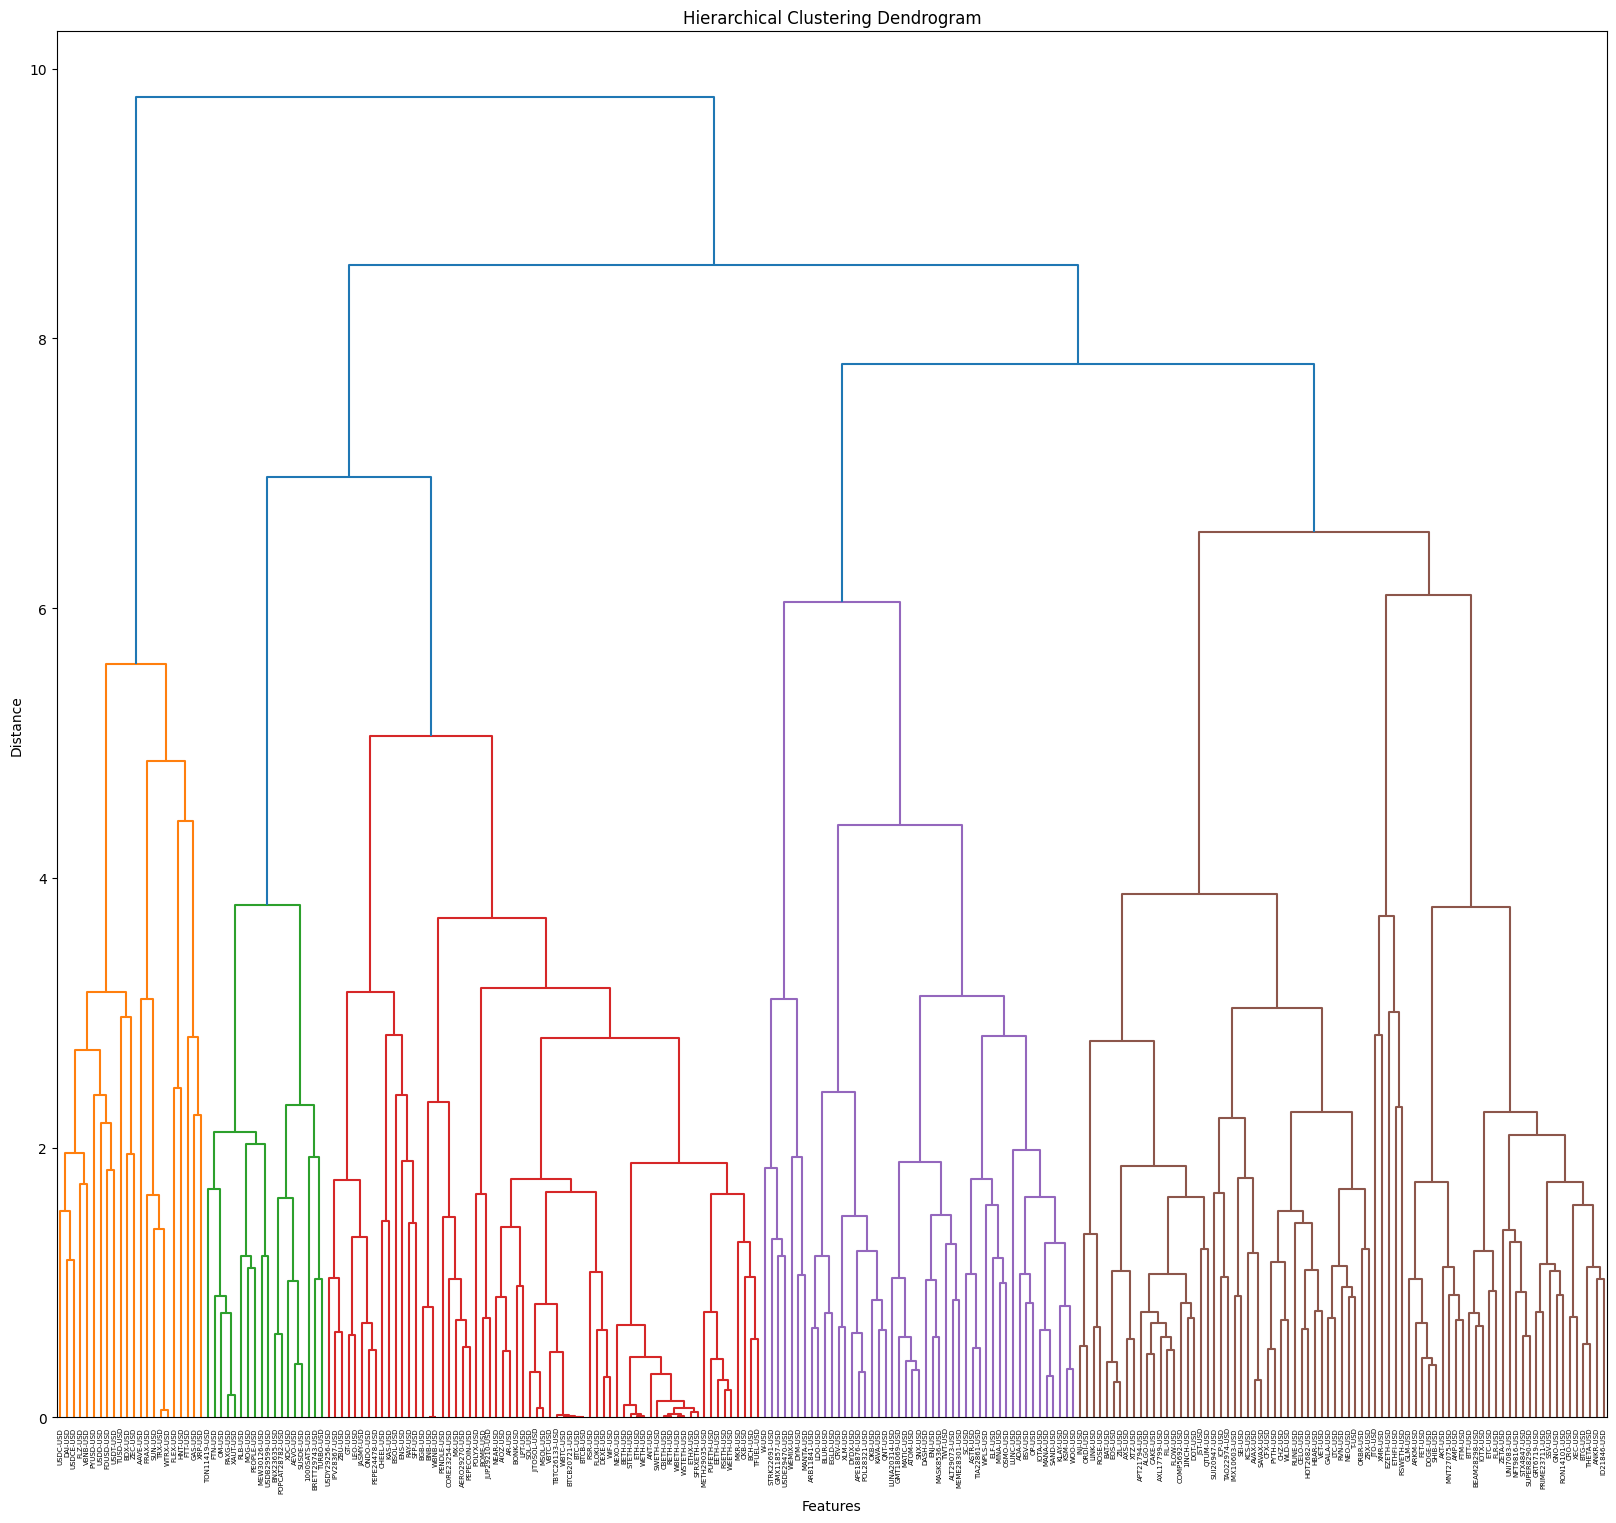

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram

dist_matrix = 1 - np.abs(correlation_Matrix)

# Perform hierarchical clustering using the linkage function
linkage_matrix = linkage(dist_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(20, 18))
dendrogram(linkage_matrix, labels=correlation_Matrix.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster

# Clusterize the data
labels = fcluster(linkage_matrix, 6.8, criterion='distance')

# Show the cluster
labels

array([2, 5, 1, 4, 3, 2, 3, 5, 5, 4, 5, 5, 3, 4, 5, 3, 4, 5, 4, 4, 5, 5,
       5, 5, 3, 1, 5, 3, 3, 4, 3, 2, 3, 3, 2, 3, 4, 3, 3, 3, 5, 5, 5, 3,
       5, 5, 3, 5, 3, 5, 3, 5, 4, 1, 4, 3, 5, 5, 4, 4, 3, 4, 4, 4, 3, 5,
       5, 3, 5, 3, 5, 1, 5, 5, 1, 3, 5, 5, 1, 1, 5, 2, 1, 5, 1, 5, 4, 4,
       5, 5, 3, 5, 1, 5, 5, 5, 5, 5, 4, 5, 3, 3, 3, 5, 5, 3, 3, 4, 5, 4,
       4, 4, 3, 5, 3, 5, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 3, 5, 2, 3, 3, 3,
       5, 3, 5, 4, 2, 3, 4, 5, 5, 4, 2, 3, 2, 3, 3, 4, 3, 2, 5, 3, 5, 1,
       4, 5, 3, 3, 2, 5, 5, 3, 3, 5, 5, 5, 4, 5, 4, 5, 3, 3, 5, 4, 3, 5,
       3, 4, 5, 5, 1, 5, 2, 3, 5, 5, 3, 3, 5, 4, 2, 1, 2, 1, 4, 5, 2, 1,
       1, 1, 4, 1, 3, 1, 3, 5, 4, 3, 3, 3, 3, 4, 3, 3, 5, 4, 4, 3, 1, 2,
       2, 5, 4, 5, 1, 5, 3, 1, 5, 5, 5], dtype=int32)